<a href="https://colab.research.google.com/github/ViRiver24/Lesson-4/blob/main/Lesson4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Завантаження набору даних CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Нормалізація даних до діапазону [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Перетворення міток у формат one-hot
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Збільшення даних (augmentation)
datagen = ImageDataGenerator(
    rotation_range=15,    # Повороти
    width_shift_range=0.1,  # Зсуви по ширині
    height_shift_range=0.1,  # Зсуви по висоті
    horizontal_flip=True   # Горизонтальне віддзеркалення
)
datagen.fit(x_train)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),  # Перший згортковий шар
    MaxPooling2D((2, 2)),  # Перший шар підсемплювання
    Conv2D(64, (3, 3), activation='relu'),  # Другий згортковий шар
    MaxPooling2D((2, 2)),  # Другий шар підсемплювання
    Conv2D(128, (3, 3), activation='relu'),  # Третій згортковий шар
    Flatten(),  # Розгортання в 1D
    Dense(128, activation='relu'),  # Повнозв’язний шар
    #Dropout(0.5),  # Dropout для регуляризації
    Dense(10, activation='softmax')  # Вихідний шар
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(
    optimizer='adam',  # Оптимізатор Adam
    loss='categorical_crossentropy',  # Функція втрат
    metrics=['accuracy']  # Метрики
)

# Визначення параметрів навчання
batch_size = 64
epochs = 10

In [8]:
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 110s 138ms/step - accuracy: 0.3241 - loss: 1.8173 - val_accuracy: 0.5321 - val_loss: 1.2976
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 144s 141ms/step - accuracy: 0.5224 - loss: 1.3254 - val_accuracy: 0.5868 - val_loss: 1.1487
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 107s 137ms/step - accuracy: 0.5834 - loss: 1.1730 - val_accuracy: 0.6437 - val_loss: 1.0144
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 144s 139ms/step - accuracy: 0.6169 - loss: 1.0823 - val_accuracy: 0.6604 - val_loss: 0.9733
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 144s 142ms/step - accuracy: 0.6463 - loss: 1.0046 - val_accuracy: 0.6902 - val_loss: 0.8836
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 140s 140ms/step - accuracy: 0.6636 - loss: 0.9609 - val_accuracy: 0.6968 - val_loss: 0.8709
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 139s 136ms/step - accuracy: 0.6811 - loss: 0.9189 - val_accuracy: 0.7240 - val_loss: 0.8083
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 108s 138ms/step - accuracy: 0.6889 - loss: 0.88

Test Accuracy: 0.74
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step


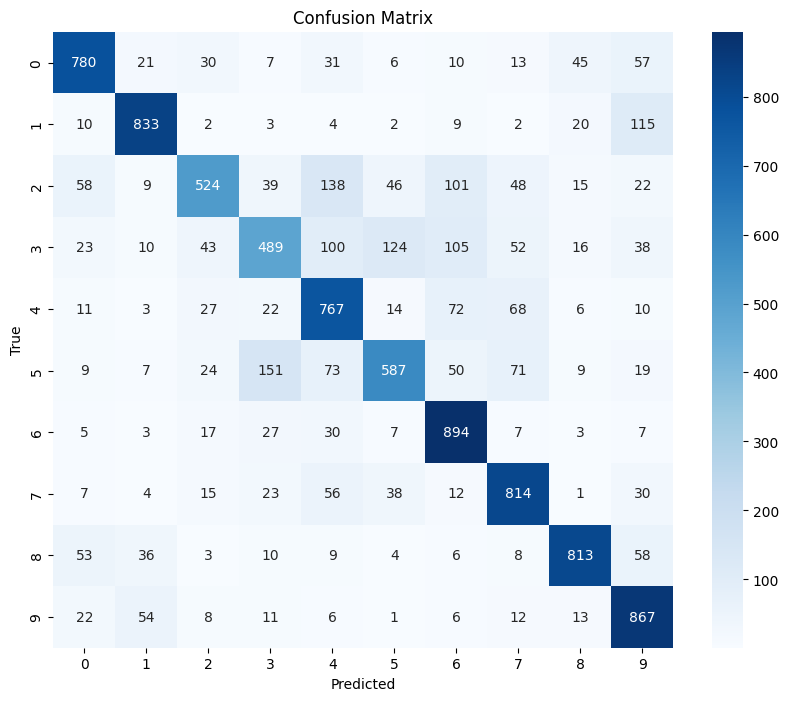

In [9]:
# Оцінка точності на тестових даних
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Побудова матриці невідповідностей
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


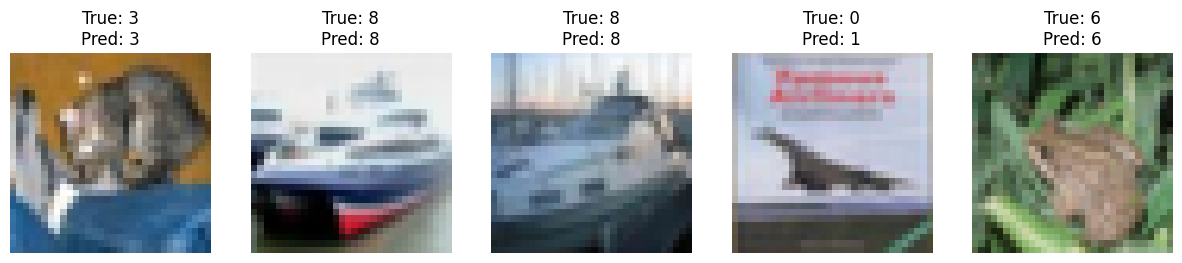

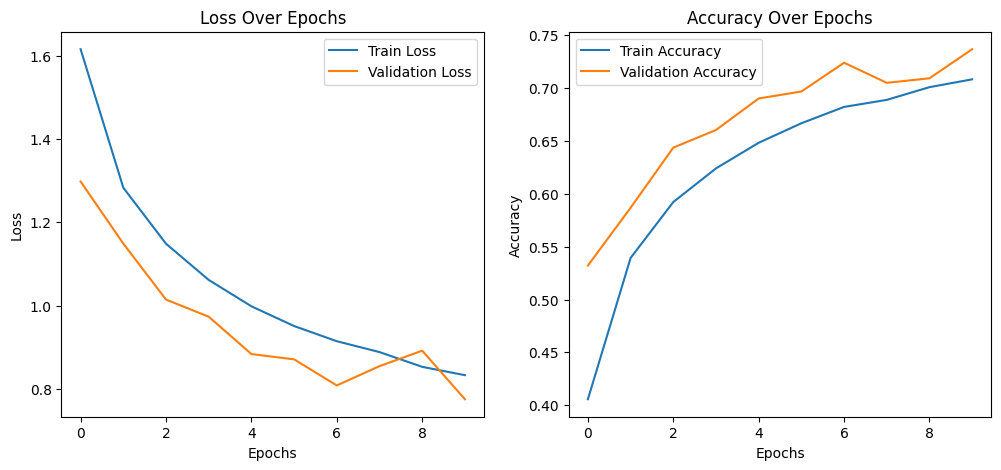

In [10]:
# Вибір кількох тестових зображень
sample_images = x_test[:5]
sample_labels = y_test[:5]

# Передбачення для цих зображень
predictions = model.predict(sample_images)

# Візуалізація
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(sample_images[i])
    ax.set_title(f"True: {np.argmax(sample_labels[i])}\nPred: {np.argmax(predictions[i])}")
    ax.axis('off')
plt.show()

# Побудова графіка втрат та точності
plt.figure(figsize=(12, 5))

# Графік втрат
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Графік точності
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()